# Chargement de donnees

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('data.csv')

display(df.head())
print(df.info())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [14]:
missing = df.isnull().sum()
print(missing[missing > 0])

Series([], dtype: int64)


In [15]:
nunique = df.nunique()
constant_cols = nunique[nunique == 1].index.tolist()
print("\n--- Colonnes constantes (n'apportent aucune info) ---")
print(constant_cols)


--- Colonnes constantes (n'apportent aucune info) ---
['EmployeeCount', 'Over18', 'StandardHours']


C:\Users\oclaz\AppData\Local\Temp\ipykernel_2848\3470272788.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Attrition', data=df, palette='viridis')


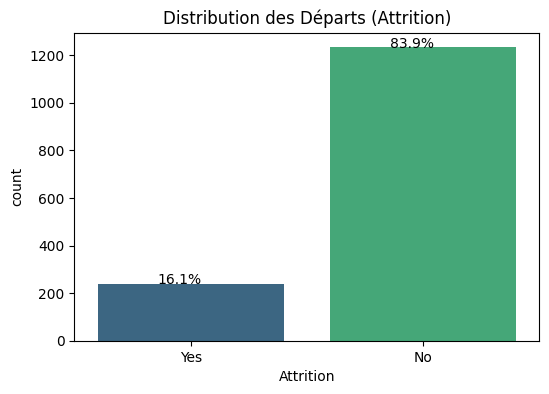

In [16]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Attrition', data=df, palette='viridis')
plt.title('Distribution des Départs (Attrition)')

# Affichage des pourcentages sur les barres
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

In [17]:
df_clean = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)
print("Colonnes supprimées. Taille du dataset :", df_clean.shape)

Colonnes supprimées. Taille du dataset : (1470, 31)


In [18]:
ordinal_cols = [
    'Education', 
    'EnvironmentSatisfaction', 
    'JobInvolvement', 
    'JobSatisfaction', 
    'PerformanceRating', 
    'RelationshipSatisfaction', 
    'WorkLifeBalance'
]

# Ces colonnes sont des vrais nombres (Age, Salaire, Années...)
continuous_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
    'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]


--- Génération des graphiques pour les variables ordinales ---


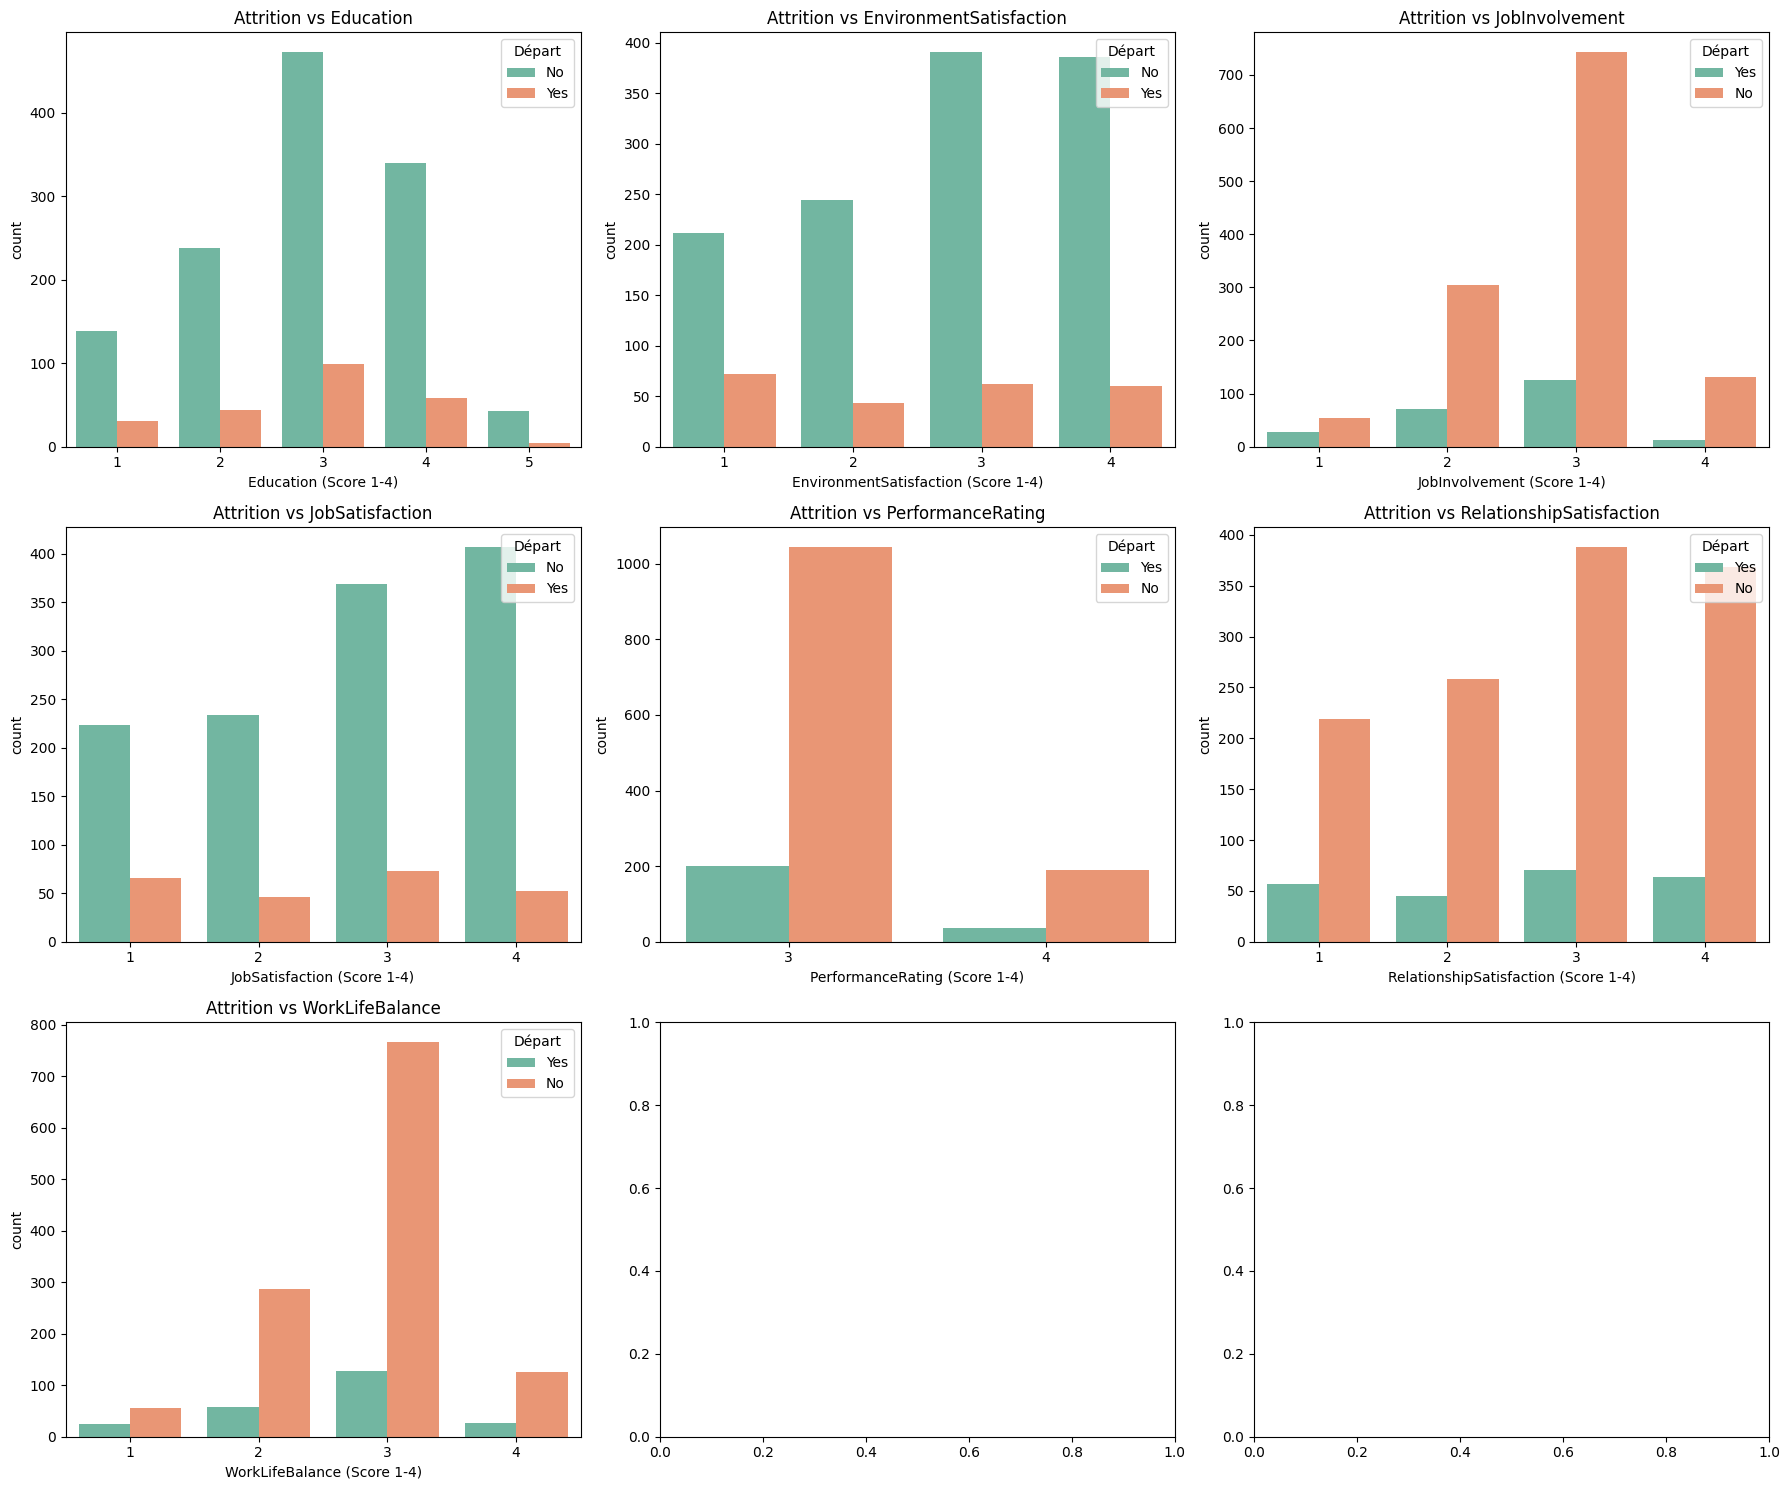

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten() # Aplatir pour itérer facilement

for i, col in enumerate(ordinal_cols):
    sns.countplot(x=col, hue='Attrition', data=df_clean, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Attrition vs {col}')
    axes[i].set_xlabel(f'{col} (Score 1-4)')
    axes[i].legend(title='Départ', loc='upper right')

plt.tight_layout()
plt.show()

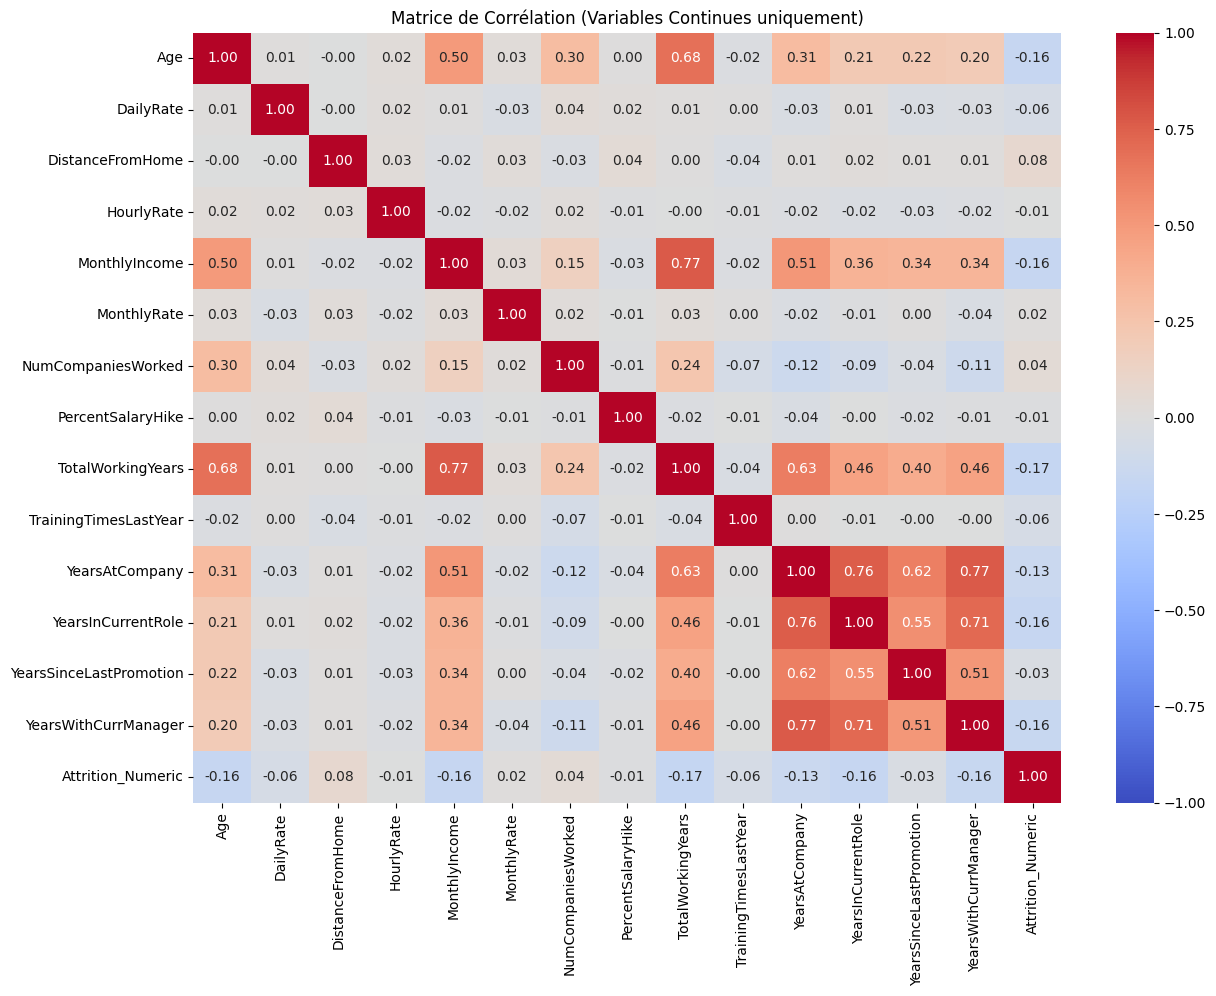

Top facteurs corrélés au départ (Corrélation négative = protège du départ) :
TotalWorkingYears      -0.171063
YearsInCurrentRole     -0.160545
MonthlyIncome          -0.159840
Age                    -0.159205
YearsWithCurrManager   -0.156199
Name: Attrition_Numeric, dtype: float64


In [20]:
df_corr = df_clean.copy()
df_corr['Attrition_Numeric'] = df_corr['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# On sélectionne SEULEMENT les colonnes continues + la cible
cols_for_corr = continuous_cols + ['Attrition_Numeric']
corr_matrix = df_corr[cols_for_corr].corr()

# Affichage de la Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation (Variables Continues uniquement)')
plt.show()

# Affichage textuel des tops corrélations
print("Top facteurs corrélés au départ (Corrélation négative = protège du départ) :")
print(corr_matrix['Attrition_Numeric'].sort_values(ascending=True).head(5))


--- Analyse détaillée des facteurs clés (Revenu, Age, Expérience) ---


C:\Users\oclaz\AppData\Local\Temp\ipykernel_2848\199444154.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_clean, ax=axes[0], palette='Pastel1')
C:\Users\oclaz\AppData\Local\Temp\ipykernel_2848\199444154.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='Age', data=df_clean, ax=axes[1], palette='Pastel1')
C:\Users\oclaz\AppData\Local\Temp\ipykernel_2848\199444154.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df_clean, ax=axes[2]

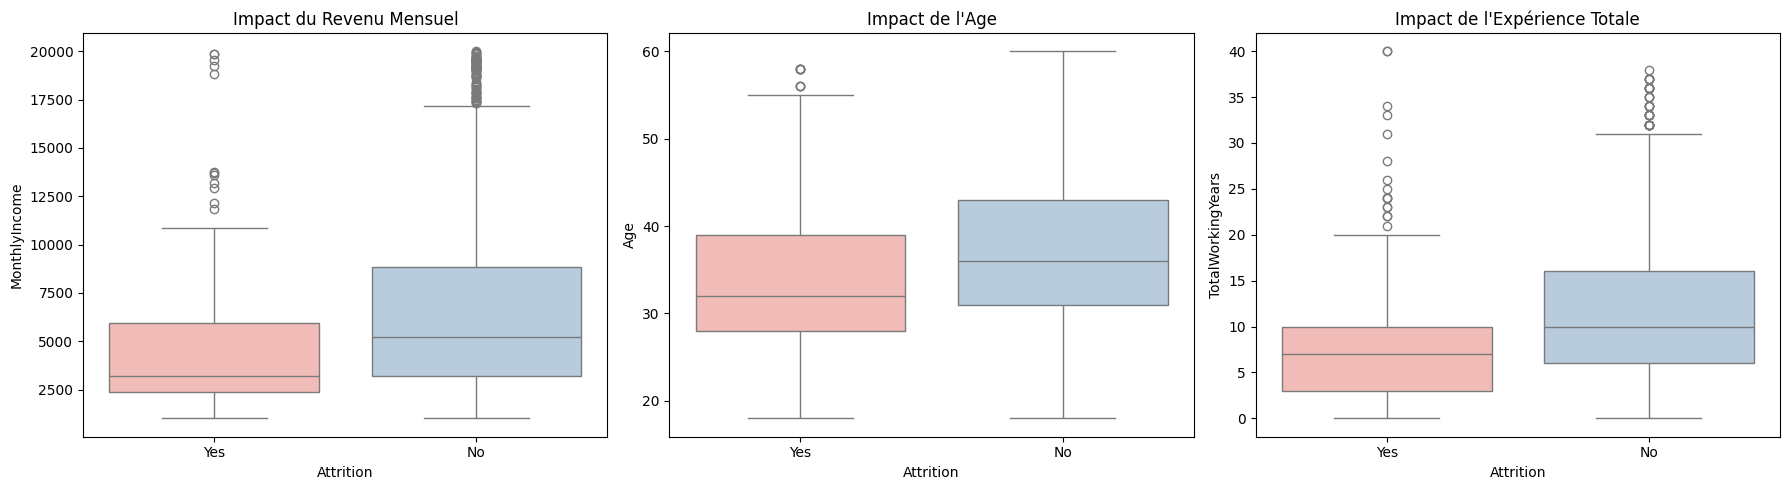

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Revenu
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_clean, ax=axes[0], palette='Pastel1')
axes[0].set_title('Impact du Revenu Mensuel')

# Age
sns.boxplot(x='Attrition', y='Age', data=df_clean, ax=axes[1], palette='Pastel1')
axes[1].set_title('Impact de l\'Age')

# Années d'expérience
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df_clean, ax=axes[2], palette='Pastel1')
axes[2].set_title('Impact de l\'Expérience Totale')

plt.tight_layout()
plt.show()